In [2]:
import numpy as np
import pandas as pd
import vocab as vocabulary
import collections
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [7]:
train = pd.read_csv('/data/SuperMod/2018-E-c-En-train.txt',delimiter="\t")
test = pd.read_csv('/data/SuperMod/2018-E-c-En-test.txt',delimiter="\t")
dev = pd.read_csv('/data/SuperMod/2018-E-c-En-dev.txt',delimiter="\t")

In [6]:
train.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0


In [9]:
dev.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-En-00866,"@RanaAyyub @rajnathsingh Oh, hidden revenge an...",1,0,1,0,0,0,0,0,0,0,0
1,2018-En-02590,I'm doing all this to make sure you smiling do...,0,0,0,0,1,1,1,0,0,0,0
2,2018-En-03361,if not then #teamchristine bc all tana has don...,1,0,1,0,0,0,0,0,0,0,0
3,2018-En-03230,It is a #great start for #beginners to jump in...,0,0,0,0,1,0,1,0,0,0,0
4,2018-En-01143,My best friends driving for the first time wit...,0,0,0,1,0,0,0,0,0,0,0


In [16]:
train.iloc[:,2:].sum(axis=0)

anger           2544
anticipation     978
disgust         2602
fear            1242
joy             2477
love             700
optimism        1984
pessimism        795
sadness         2008
surprise         361
trust            357
dtype: int64

In [24]:
train.iloc[2,1]

"@Max_Kellerman  it also helps that the majority of NFL coaching is inept. Some of Bill O'Brien's play calling was wow, ! #GOPATS"

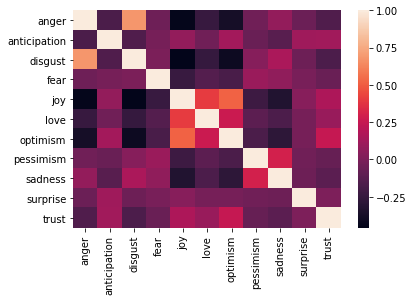

In [17]:
ax = sns.heatmap(train.iloc[:,2:].corr(method='pearson'))

In [ ]:
## Joy, love, optimism are very closely related to each other
## disgust and anger very close
## sadness and pessimism very close

### The original combined classes are joy, anger, fear, sadness
It might make sense to limit to only those 4 classes